In [13]:
"""Chapter 3 | Linear Regression applied exercises."""
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from ISLP import load_data


In [14]:
# (a) For each predictor, fit a simple linear regression model to predict
# the response. Describe your results. In which of the models is there a
# statistically significant association between the predictor and the
# response? Create some plots to back up your assertions.
boston_data = load_data("Boston")

coefs = {}

predictors = [column for column in boston_data.columns if column != "crim"]

print("predictor", "coef", "pvalue")
for predictor in predictors:
    model = "crim ~ " + predictor
    results = smf.ols(formula=model, data=boston_data).fit()
    print(predictor, results.params[predictor], results.pvalues[predictor])
    coefs[predictor] = [results.params[predictor]]

# Every predictor appears to have low enough p-values for us to reject the
# respective null hypothesis that each predictor does not have a relationship
# with the response.


predictor coef pvalue
zn -0.07393497740412301 5.506472107679206e-06
indus 0.5097763311042269 1.4503489330273334e-21
chas -1.8927765508037848 0.20943450153520018
nox 31.248531201122923 3.751739260356923e-23
rm -2.68405122411395 6.346702984687782e-07
age 0.10778622713953297 2.854869350244095e-16
dis -1.5509016824100992 8.519948766926326e-19
rad 0.6179109273272022 2.693844398185789e-56
tax 0.029742252822765325 2.357126835256544e-47
ptratio 1.1519827870705903 2.9429224473598156e-11
lstat 0.548804782062398 2.6542772314731968e-27
medv -0.3631599222576029 1.1739870821943443e-19


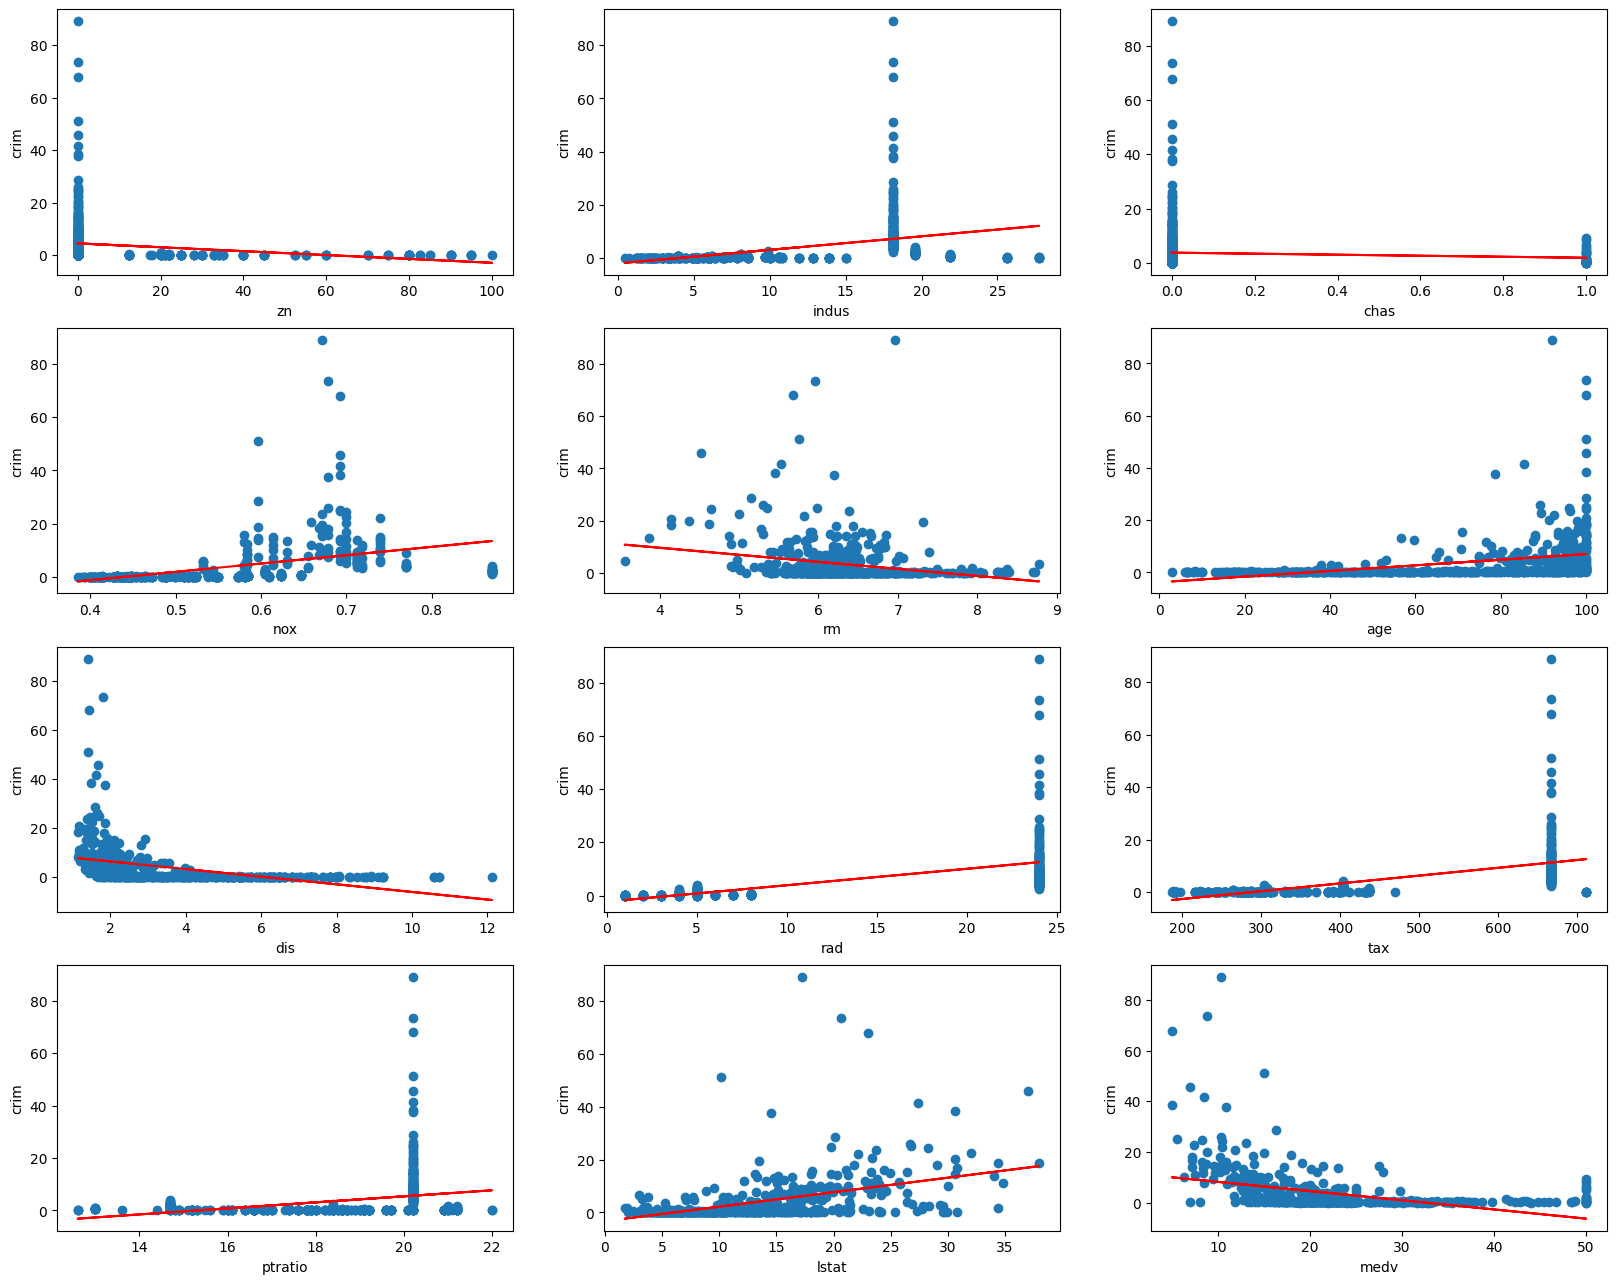

In [15]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = "crim ~ " + predictor
    results = smf.ols(formula = model, data=boston_data).fit()
    plt.subplot(5, 3, i+1)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(boston_data[predictor], boston_data["crim"])
    plt.plot(boston_data[predictor], results.fittedvalues, color='red')

In [16]:
# b) Fit a multiple regression model to predict the response using all of the
# predictors. Describe your results. For which predictors can we reject the
# null hypothesis H0 : βj = 0?
all_columns = "+".join(
    [column for column in boston_data.columns if column != "crim"]
)
model = "crim ~ " + all_columns
results = smf.ols(formula = model, data=boston_data).fit()
print(results.summary())

# We can reject the null hypothesis for the following predictors:
# ZN, DIS, RAD, and MEDV.

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.03e-56
Time:                        15:29:26   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

In [17]:
for pred in coefs:
    coefs[pred].append(results.params[pred])

print(coefs)

{'zn': [-0.07393497740412301, 0.04571003863975357], 'indus': [0.5097763311042269, -0.058350110665978665], 'chas': [-1.8927765508037848, -0.8253775522410218], 'nox': [31.248531201122923, -9.957586547089425], 'rm': [-2.68405122411395, 0.6289106621782148], 'age': [0.10778622713953297, -0.0008482790661887779], 'dis': [-1.5509016824100992, -1.0122467382083928], 'rad': [0.6179109273272022, 0.6124653114967984], 'tax': [0.029742252822765325, -0.003775646523442595], 'ptratio': [1.1519827870705903, -0.30407275723123695], 'lstat': [0.548804782062398, 0.13880059677675974], 'medv': [-0.3631599222576029, -0.220056359039208]}


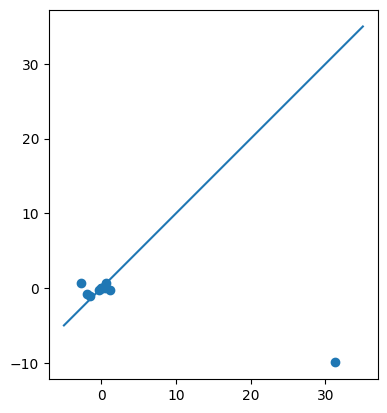

In [18]:
plt.scatter(
    [coefs[pred][0] for pred in coefs],
    [coefs[pred][1] for pred in coefs]
)
plt.plot([-5,35],[-5,35]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

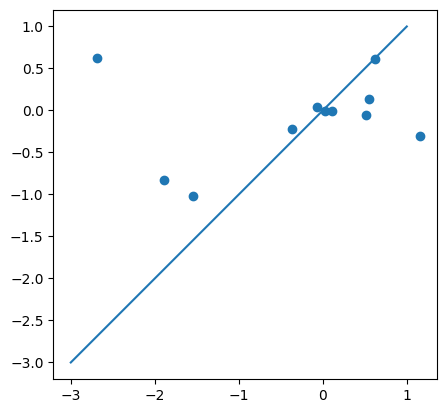

In [19]:
plt.scatter(
    [coefs[pred][0] for pred in coefs if pred != "nox"],
    [coefs[pred][1] for pred in coefs if pred != "nox"]
)
plt.plot([-3,1], [-3,1]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [20]:
for pred in coefs:
    print(pred, coefs[pred][0], coefs[pred][1])

zn -0.07393497740412301 0.04571003863975357
indus 0.5097763311042269 -0.058350110665978665
chas -1.8927765508037848 -0.8253775522410218
nox 31.248531201122923 -9.957586547089425
rm -2.68405122411395 0.6289106621782148
age 0.10778622713953297 -0.0008482790661887779
dis -1.5509016824100992 -1.0122467382083928
rad 0.6179109273272022 0.6124653114967984
tax 0.029742252822765325 -0.003775646523442595
ptratio 1.1519827870705903 -0.30407275723123695
lstat 0.548804782062398 0.13880059677675974
medv -0.3631599222576029 -0.220056359039208


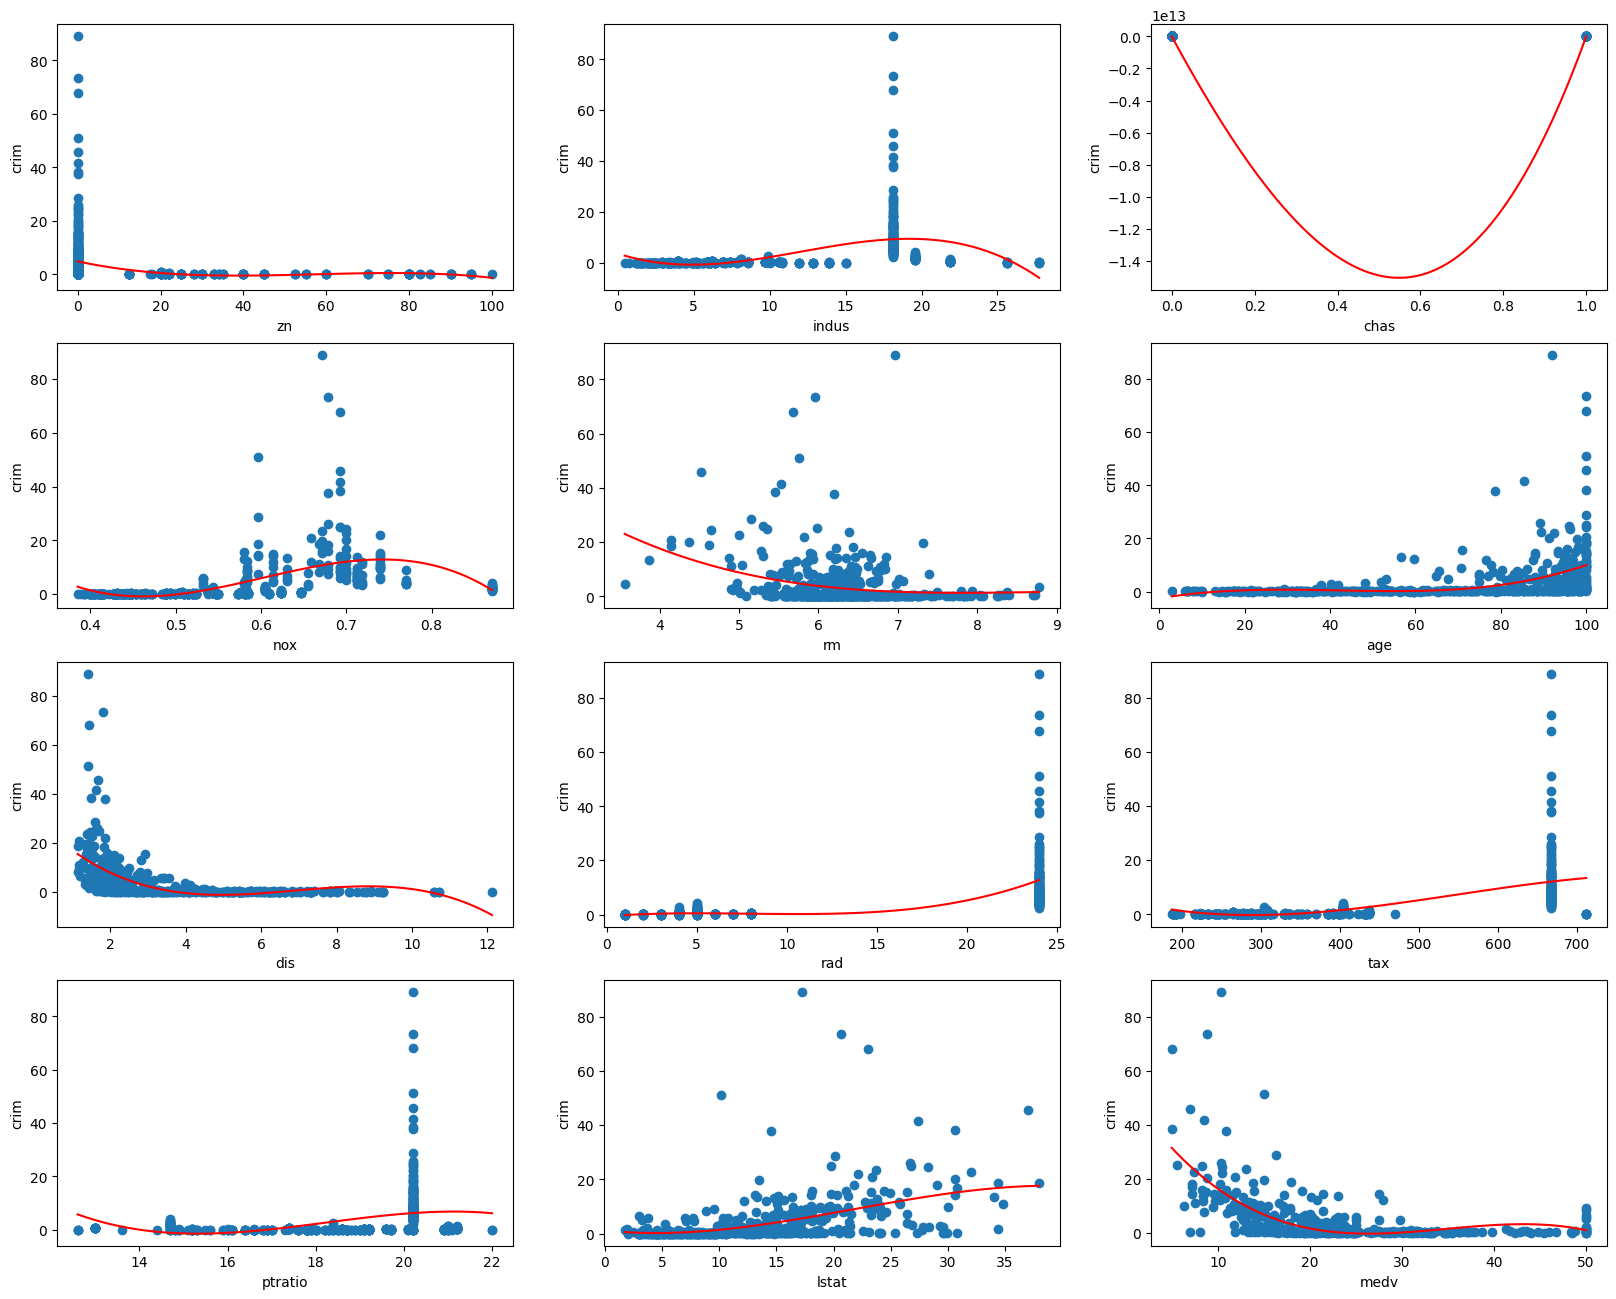

In [21]:
# (d) Is there evidence of non-linear association between any of the
# predictors and the response? To answer this question, for each predictor X,
# fit a model of the form Y = β0 + β1X + β2X2 + β3X3 + ε.

coefs = {}

plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = (
        "crim ~ " + predictor
        + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    )
    res = smf.ols(formula = model, data=boston_data).fit()
    plt.subplot(5, 3, i+1)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(boston_data[predictor], boston_data["crim"])
    x = np.linspace(
        min(boston_data[predictor]), max(boston_data[predictor]), 100
    )
    y = (
        res.params[0] + x * res.params[1]
        + res.params[2]*(x**2)
        + res.params[3]*(x**3)
    )
    plt.plot(x, y, color="red")